**ACOUSTIC EXTINGUISHER  FIRE DATASET**

**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**EDA - EXPLORATORY DATA ANALYSIS**

**Data Collection**

In [2]:
# Reading the input file
data = pd.read_excel('Fire.xlsx')

In [3]:
data.head()   # displays the first five rows of the dataframe

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


**Analyzing the Data**

In [4]:
data.shape   # returns a tuple of array dimension that specifies the number of rows and columns

(17442, 7)

In [5]:
data.info()   # prints the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


**UNIVARIATE ANALYSIS**

**The process of analyzing each variable separately.**

In [6]:
data.describe()   # returns the statistical summary of the data

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


*NOTE: The 'FUEL' column is missing, we have to include it.*

In [7]:
data.describe(include=['object'])

,FUEL
count,17442
unique,4
top,gasoline
freq,5130


**Plotting the continuous column**

*Distribution Plot*

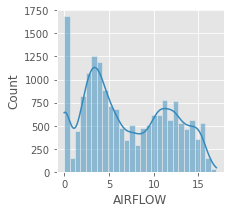

In [8]:
plt.figure(figsize=(3,3))
plt.style.use('ggplot')
sns.histplot(data.AIRFLOW, kde=True)

*When the airflow is more the flame is in extinction state.*

**Plotting the categorical variables**

In [9]:
data['STATUS'].value_counts()

0    8759
1    8683
Name: STATUS, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


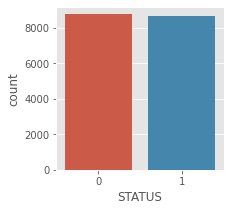

In [10]:
plt.figure(figsize=(3,3))
plt.style.use('ggplot')
sns.countplot(data.STATUS)

*STATUS: (Extinction = 1 and Non-Extinction = 0)*

*Difference between Extinction state of the flame is more or less same.*

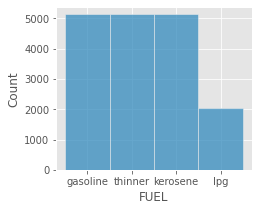

In [11]:
plt.figure(figsize=(3.5,3))
plt.style.use('ggplot')
sns.histplot(data.FUEL)

*LPG is used very less in the dataset compared to other fuels.*

**BIVARIATE ANALYSIS**

**This gives the relationship between the two variables.**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


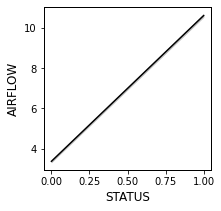

In [12]:
plt.figure(figsize=(3,3))
plt.style.use('grayscale')
plt.grid(False)
sns.lineplot(data.STATUS, data.AIRFLOW)

*If airflow is more then the Extinction status of the flame is 0 (Non-Extinct) and If airflow is less then the Extinction status of the flame is 1 (Extinct).*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


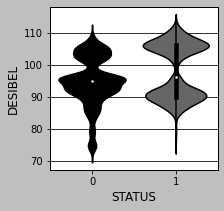

In [13]:
plt.figure(figsize=(3,3))
plt.style.use('grayscale')
sns.violinplot(data.STATUS, data.DESIBEL)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


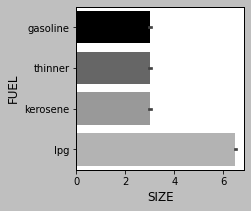

In [14]:
plt.figure(figsize=(3,3))
plt.style.use('grayscale')
plt.grid(False)
sns.barplot(data.SIZE, data.FUEL)

*The flame size of LPG is comparatively higher.*

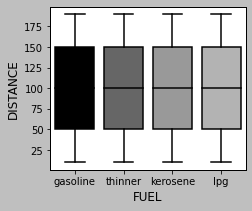

In [15]:
plt.figure(figsize=(3.5,3))
plt.style.use('grayscale')
plt.grid(False)
sns.boxplot(data=data, x = 'FUEL', y = 'DISTANCE'); 

<Figure size 252x216 with 0 Axes>

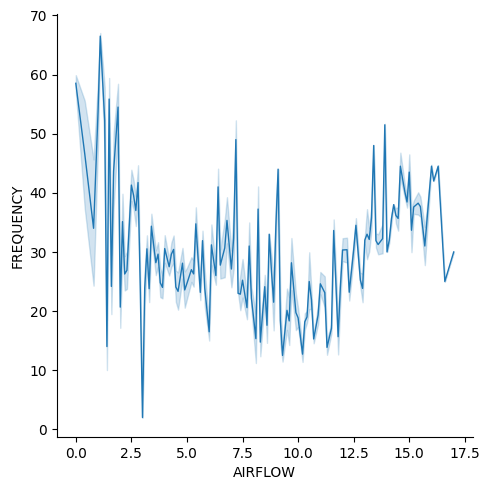

In [16]:
plt.figure(figsize=(3.5,3))
plt.style.use('default')
sns.relplot(x = 'AIRFLOW', y = 'FREQUENCY', data = data, kind = 'line', linewidth=1);
plt.show()

**MULTIVARIATE ANALYSIS**

**Multivariate analysis is a more complex form of a statistical analysis technique and is used when there are more than two variables in the data set.**

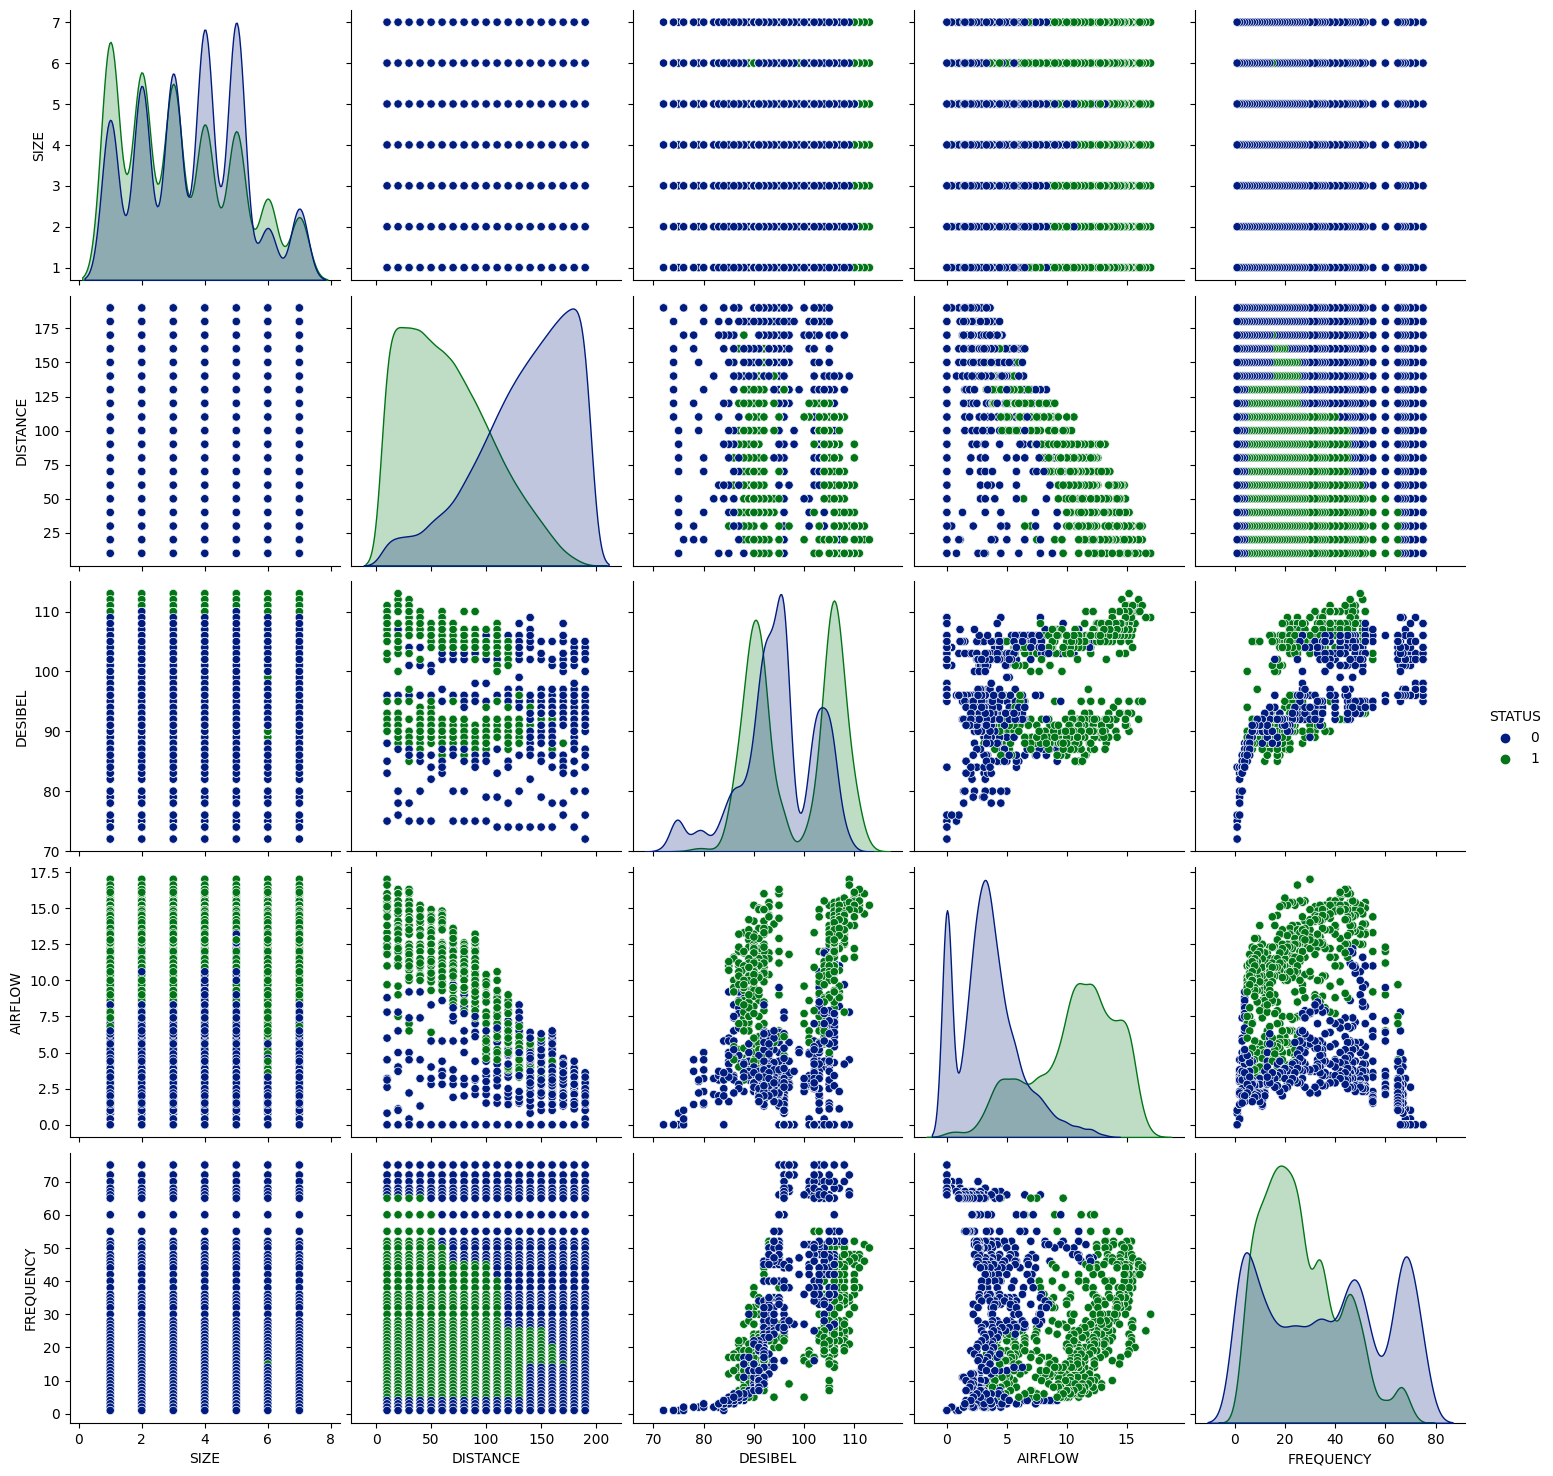

In [17]:
plt.style.use('seaborn-dark-palette')
sns.pairplot(data, hue='STATUS', height=3)
plt.show()

**Data Cleaning**

**1. Analyze the numerical and categorical features, and convert categorical feature into numerical.**

In [18]:
data['FUEL'].unique()

array(['gasoline', 'thinner', 'kerosene', 'lpg'], dtype=object)

In [19]:
data['FUEL'].value_counts()

gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: FUEL, dtype: int64

In [21]:
# converting categorical column into numerical
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
data["FUEL"] = ord_encoder.fit_transform(data[["FUEL"]])
ord_encoder.categories_

[array(['gasoline', 'kerosene', 'lpg', 'thinner'], dtype=object)]

*0 - Gasoline ; 1 - Kerosene ; 2 - LPG ; 3 - Thinner* 

In [22]:
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0.0,10,96,0.0,75,0
1,1,0.0,10,96,0.0,72,1
2,1,0.0,10,96,2.6,70,1
3,1,0.0,10,96,3.2,68,1
4,1,0.0,10,109,4.5,67,1


In [23]:
data.tail()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
17437,7,2.0,190,86,2.2,5,0
17438,7,2.0,190,84,2.0,4,0
17439,7,2.0,190,80,1.5,3,0
17440,7,2.0,190,76,0.4,2,0
17441,7,2.0,190,72,0.0,1,0


**2. Check for missing values and handle them.**

In [24]:
data.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

**3.Check for duplicate values**

In [25]:
data.duplicated().any()

False

**4.Check for outliers. If present try to handle them.**

In [26]:
data.skew()

SIZE         0.278724
FUEL         0.209609
DISTANCE     0.000000
DESIBEL     -0.179047
AIRFLOW      0.244368
FREQUENCY    0.434892
STATUS       0.008715
dtype: float64

SIZE
Skewness: 0.2786998636581806


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


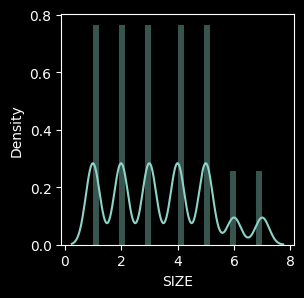

FUEL
Skewness: 0.20959140221588837


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


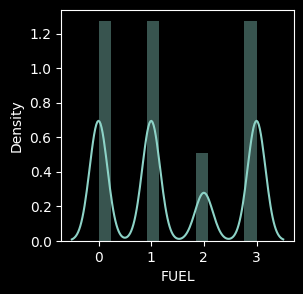

DISTANCE
Skewness: 0.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


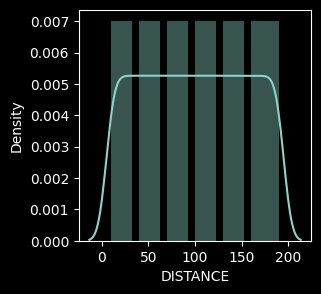

DESIBEL
Skewness: -0.17903195807888958


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


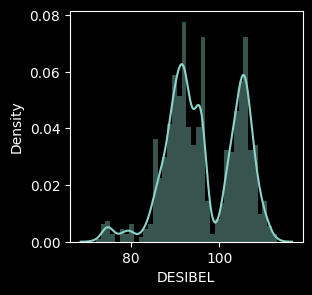

AIRFLOW
Skewness: 0.24434745944124117


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


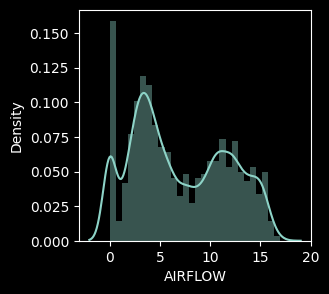

FREQUENCY
Skewness: 0.4348548916349596


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


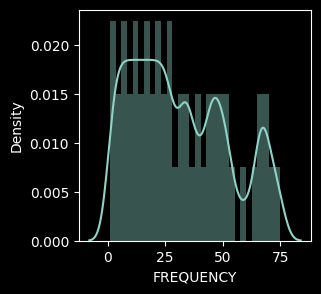

STATUS
Skewness: 0.008714679678955612


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


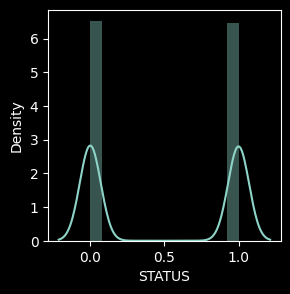

In [28]:
from scipy.stats import skew
for column in data:
    print(column)
    print(f"Skewness: {skew(data[column])}")
    plt.figure(figsize=(3,3))
    plt.style.use('dark_background')
    sns.distplot(data[column])
    plt.grid(False)
    plt.show()

**CORRELATION**

In [29]:
correlation = data.corr()
correlation

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
SIZE,1.000000e+00,1.161420e-01,-2.437871e-15,-6.125585e-15,1.677898e-16,9.978281e-17,-0.096947
FUEL,1.161420e-01,1.000000e+00,-5.956652e-16,-1.383383e-14,-8.832434e-16,-1.081887e-15,-0.019384
DISTANCE,-2.437871e-15,-5.956652e-16,1.000000e+00,-2.385897e-01,-7.074906e-01,-2.452947e-17,-0.644051
DESIBEL,-6.125585e-15,-1.383383e-14,-2.385897e-01,1.000000e+00,3.769153e-01,5.617409e-01,0.203970
AIRFLOW,1.677898e-16,-8.832434e-16,-7.074906e-01,3.769153e-01,1.000000e+00,-2.120462e-01,0.760628
FREQUENCY,9.978281e-17,-1.081887e-15,-2.452947e-17,5.617409e-01,-2.120462e-01,1.000000e+00,-0.244203
STATUS,-9.694718e-02,-1.938442e-02,-6.440506e-01,2.039698e-01,7.606279e-01,-2.442030e-01,1.000000


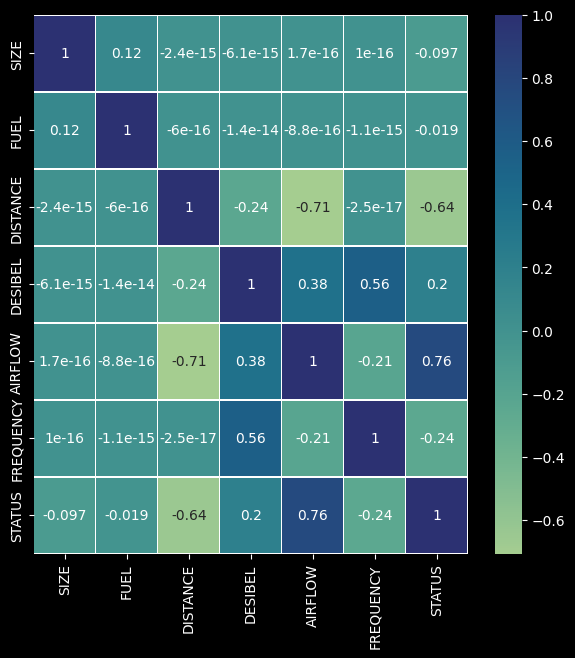

In [30]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

**MODELLING**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
X=data.drop(['STATUS'],axis=1)
y=data['STATUS']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

**DECISION TREE**

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier()
classifier1.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)

In [33]:
confusion_matrix(y_test,y_pred)

array([[1694,   67],
       [  60, 1668]])

In [34]:
accuracy_score(y_test,y_pred)

0.9635998853539696

**SUPPORT VECTOR MACHINE**

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScalar
svc = StandardScalar()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

ImportError: ignored

In [36]:
confusion_matrix(y_test,y_pred)

array([[1694,   67],
       [  60, 1668]])

In [37]:
print(accuracy_score(y_test,y_pred))

0.9635998853539696


**K - NEAREST NEIGHBOURS**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [39]:
confusion_matrix(y_test,y_pred)

array([[1630,  131],
       [ 149, 1579]])

In [40]:
accuracy_score(y_test,y_pred)

0.9197477787331614

**RANDOM FOREST**

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier()
classifier1.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_pred.shape

(3489,)

In [43]:
confusion_matrix(y_test,y_pred)

array([[1630,  131],
       [ 149, 1579]])

In [44]:
print(accuracy_score(y_test,y_pred))

0.9197477787331614


**LOGISTIC REGRESSION**

In [45]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [46]:
confusion_matrix(y_test,y_pred)

array([[1573,  188],
       [ 253, 1475]])

In [47]:
accuracy_score(y_test,y_pred)

0.8736027515047291

**NAIVE BAYES**

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

In [49]:
confusion_matrix(y_test,y_pred)

array([[1583,  178],
       [ 283, 1445]])

In [50]:
accuracy_score(y_test,y_pred)

0.8678704499856692

**SAVING THE TRAINED MODEL**

In [51]:
import pickle

In [52]:
filename = 'fireextinction_trained.sav'
pickle.dump(classifier1,open(filename,'wb'))

**LOADING THE TRAINED MODEL**

In [53]:
loaded_model = pickle.load(open('fireextinction_trained.sav','rb'))

In [54]:
# Evaluating
input_data = (7,2,190,72,0,1) #17443
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = loaded_model.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("STATUS: Flame is NOT-EXTINCTED")
else:
    print("STATUS: Flame is EXTINCTED")

[0]
STATUS: Flame is NOT-EXTINCTED


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
# Evaluating
input_data = (5,1,100,91,9,16) #14890
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier1.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("STATUS: FLAME IS NOT EXTINCTED")
else:
    print("STATUS: FLAME IS EXTINCTED")

[1]
STATUS: FLAME IS EXTINCTED


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
